# Group 4  EDA   summary


Question 5
<ul>
    
<li>Distribution of properties per city (we need to know which cities we can make prediction for)
</ul>



Question 6 
<ul>
    
<li>Distribution of properties per building type (shop/apartment/...): checking if data is imbalanced
</ul>

Question 9

<ul>
    <li> (a) How does property price differentiate between commercial and residential areas (e.g.commercial properties generally have a higher prices compared to residential properties)?
    <li> (b) Explore the price over building type (shop/ apartment/...)
    
</ul>

**<h6> Summary </h6>**
1. Question 5:
    - We can observe that this dataset includes a large number of cities. There are some cities with very few properties. (For instance, the single property in Feni).
    - Due to the large number of cities that may be chosen, it would be quite difficult to illustrate which ones have the greatest amount of properties.
    - Cities with few properties might be grouped together under the heading "Other." We examined every city with fewer than 100 properties, and we grouped every one of them.
    - We can clearly identify which cities we can forecast after grouping them and observing how well the pictorial representation conveys them.
    - By seeing this we can can an idea about which cities we can make prediction for.
2. Question 6:
    - The property distribution per <i>"building_type"</i> consists of majority value ("Apartment") resulting in 80% of the data ([click_here](#pie_chart_building_type)) .
    - Hence the data is imbalanced and heavily skewed on <i>Aparatment<i>.
    - The mean price sale and rent of each <i>"building_type"</i> ([click here](#avg_price_building_type)) is found. 
    - Even after grouping the <i>building_types</i> with fewer rows into one value <i>"Other"</i> the data is still not balanced. 
3. Question 9a:
    - The mean sale and rent price is found for <i>building_nature</i> (Residential,Commercial).
        - The mean sale price for Residential property is exponentially larger than Commercial sale price.
        - But when it comes to mean rent price, it is the opposite. ([click here](#sale_rent_price))
    - Removing outliers ( values  greater than 90 percentile) we find that the third quartile of sale and rent prices of Residential tends to be on the higher end when compared to commercial ([click here](#price_building_nature))
    - The impact of area and city on prices is also found.
        - The commercial sale price tends to increase exponentially with area while the residential sale price linearly increases with area
        - The commercial rent prices tend to have a slightly greater increase in price with increasing area compared to residential rent prices.
4. Question 9b:
    - The answer to the question is given [here](#avg_price_building_type).
    - We can see that the first step is to use mean to determine the price's average. To accomplish that, we must look for outliers.
    - After determining the price's mean, we compare it to the building type's prices and investigate them.
    - We recognise that each building type has a use (for sale or rental), and we compare each pricing to that use in order to better understand its cost.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
data = pd.read_csv("merged_datasets.csv")

C:\Users\Mohamed Adnan\AppData\Local\Temp\ipykernel_6592\228374165.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("merged_datasets.csv")


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33703 entries, 0 to 33702
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  33703 non-null  int64  
 1   area                                   33703 non-null  float64
 2   building_type                          33703 non-null  object 
 3   building_nature                        33703 non-null  object 
 4   image_url                              17265 non-null  object 
 5   num_bath_rooms                         33703 non-null  float64
 6   num_bed_rooms                          33703 non-null  float64
 7   price                                  33703 non-null  float64
 8   property_description                   19029 non-null  object 
 9   property_overview                      18509 non-null  object 
 10  property_url                           33679 non-null  object 
 11  pu

### Data wrangling


Column : **<i>building_type** 



In [106]:
data["building_type"].unique()


array(['Apartment', 'Shop', 'Floor', 'Office', 'Building', 'Plot',
       'Duplex', 'Warehouse', 'Factory', 'Apartment/Flats',
       'Office space', 'Duplex Home', 'Showroom / Shop / Restaurant',
       'Independent House', 'House', 'Commerical - Other',
       'Apartment, Commercial', 'Showroom/Shop/Restaurant',
       'Office Space', 'Residential Plot', 'Industrial Space',
       'Commercial Plot', 'Land Sharing Flat', 'Sublet/Room'],
      dtype=object)

In [107]:
#len(data[data["building_type"].str.contains("Apartment")].building_type.index) ,len(data[data["building_type"] =="Apartment"].building_type.index) 

**Combining similar types to a singular type**

In [108]:
data["building_type"].value_counts()

Apartment                       26524
Office                           2210
Building                         1412
Shop                              946
Floor                             880
Plot                              791
Apartment/Flats                   416
House                             172
Residential Plot                  133
Duplex                             77
Office space                       41
Warehouse                          29
Factory                            19
Office Space                       15
Showroom/Shop/Restaurant            8
Duplex Home                         7
Commercial Plot                     5
Commerical - Other                  4
Land Sharing Flat                   4
Independent House                   3
Showroom / Shop / Restaurant        2
Industrial Space                    2
Apartment, Commercial               2
Sublet/Room                         1
Name: building_type, dtype: int64

In [109]:
# creating a new column  
data["new_building_type"] = data["building_type"]

In [110]:
# The following attributes are combined 
#
# Apartment - 'Apartment', 'Apartment/Flats', 'Apartment,Commercial'
# Office - 'Office', 'Office Space', 'Office space'
# Shop - 'Shop', 'Showroom / Shop / Restaurant', 'Showroom/Shop/Restaurant'
# Plot - 'Commercial Plot', 'Plot', 'Residential Plot'
# Commercial - 'Commercial - Other'
# House - 'House', 'Independent House'
# Duplex - 'Duplex', 'Duplex Home'

apat_vals = data[data["building_type"].str.contains("Apartment")].building_type
office_vals = data[data["building_type"].str.contains("Office")].building_type
shop_vals = data[data["building_type"].str.contains("Shop")].building_type
plot_vals = data[data["building_type"].str.contains("Plot")].building_type
commercial_vals = data[data["building_type"].str.contains("Commercial")].building_type
house_vals = data[data["building_type"].str.contains("House")].building_type
duplex_vals = data[data["building_type"].str.contains("Duplex")].building_type


# Replacing the values obtained from the dictionary abov    
data["new_building_type"].replace(set(apat_vals),value = "Apartment",inplace = True)
data["new_building_type"].replace(set(office_vals),value = "Office",inplace = True)
data["new_building_type"].replace(set(shop_vals),value = "Shop",inplace = True)
data["new_building_type"].replace(set(plot_vals),value = "Plot",inplace = True)
data["new_building_type"].replace(set(commercial_vals),value = "Commercial",inplace = True)
data["new_building_type"].replace(set(house_vals),value = "House",inplace = True)
data["new_building_type"].replace(set(duplex_vals),value = "Duplex",inplace = True)

In [111]:
data["new_building_type"].value_counts()

Apartment             26942
Office                 2266
Building               1412
Shop                    956
Plot                    929
Floor                   880
House                   175
Duplex                   84
Warehouse                29
Factory                  19
Commerical - Other        4
Land Sharing Flat         4
Industrial Space          2
Sublet/Room               1
Name: new_building_type, dtype: int64

Column : **<i>city**

**Multiple cities are having single digit rows**



In [112]:
data["city"].value_counts()

Dhaka               28683
Chattogram           3481
Narayanganj City      441
Barishal              352
Gazipur               323
Rangpur                73
Dinajpur               64
Sylhet                 57
Rajshahi               56
Narayanganj            49
Khulna                 39
Bogura                  8
Thakurgaon              8
Mymensingh              8
Cumilla                 5
Narsingdi               4
Magura                  4
Chittagong              4
Manikganj               4
Barguna                 4
Chandpur                3
Jashore                 3
Kushtia                 3
Moulvibazar             2
Nilphamari              2
Madaripur               2
Noakhali                2
Brahmanbaria            2
Tangail                 2
Naogaon                 1
Sirajganj               1
Lakshmipur              1
Sherpur                 1
Gaibandha               1
Gopalganj               1
Nawabganj               1
Bandarban               1
Habiganj                1
Kishoreganj 

<h6>Cities with less than 100 rows are grouped into a single value ( <i>"Other"</i> )

In [113]:
# grouping column "city" and finding out the cities with fewer than 100 rows
city = data.groupby("city")["city"].agg("count")
city_less_100 = city[city<100]

# creating a new column and grouping the cities with less than 100 rows to "Other"
data["new_city"] = data["city"].apply(lambda i:"Other" if i in city_less_100 else i)
data["new_city"].value_counts()

Dhaka               28683
Chattogram           3481
Narayanganj City      441
Other                 423
Barishal              352
Gazipur               323
Name: new_city, dtype: int64

## Question 6



    
#### Distribution of properties per building type (shop/apartment/...): checking if data is imbalanced


C:\Users\Mohamed Adnan\AppData\Local\Temp\ipykernel_6592\1066027251.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(data["new_building_type"].unique(),loc='upper right',labels = labels)


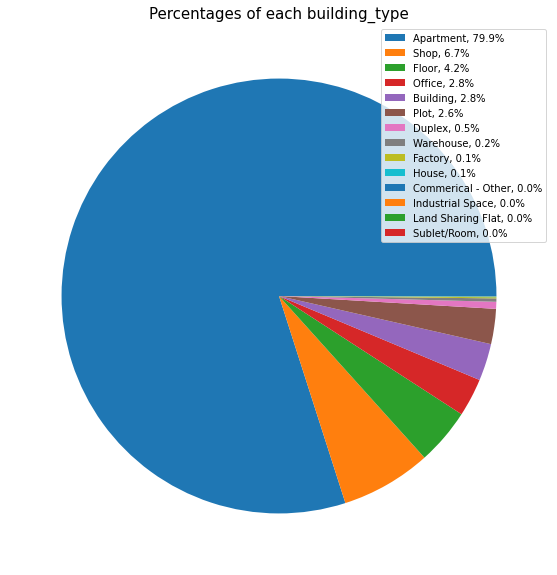

In [114]:
# Finding out the percentages of each building_type with a pie chart
labels = [f'{l}, {s:0.1f}%' for l, s in zip(data["new_building_type"].unique(), (data["new_building_type"].value_counts()/33703)*100)]
plt.figure(figsize = (20,10))
plt.pie(data["new_building_type"].value_counts(),)
plt.legend(data["new_building_type"].unique(),loc='upper right',labels = labels)
plt.title("Percentages of each building_type",fontsize = 15)
plt.show()

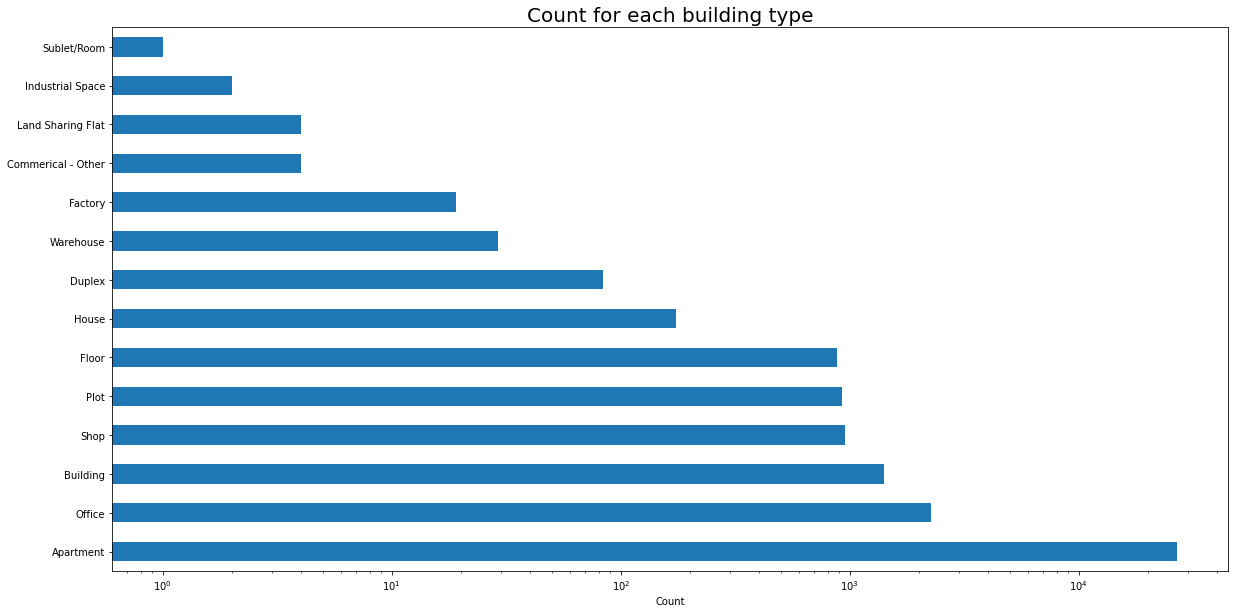

In [115]:

plt.figure(figsize = (20,10))
data["new_building_type"].value_counts().plot(kind = "barh")
plt.title("Count for each building type",fontsize = 20)
plt.xlabel("Count")
plt.xscale("log")

In [116]:
#  finding out the building types having less than 50 rows 
building_type_values = data.groupby("new_building_type")["new_building_type"].agg("count")
building_values_less_than_50 = building_type_values[building_type_values < 50]
building_values_less_than_50

new_building_type
Commerical - Other     4
Factory               19
Industrial Space       2
Land Sharing Flat      4
Sublet/Room            1
Warehouse             29
Name: new_building_type, dtype: int64

**Multiple <i>building_type</i> values have fewer than 1%. The values with lesser than 1% are grouped together and put into a single value <i>Other</i>**

In [117]:
# grouping the building types with less than 50 rows to "Other" 
data["new_building_type"] = data["new_building_type"].apply(lambda i: "Other" if i in building_values_less_than_50 else i)
data["new_building_type"].value_counts()

Apartment    26942
Office        2266
Building      1412
Shop           956
Plot           929
Floor          880
House          175
Duplex          84
Other           59
Name: new_building_type, dtype: int64

<a id="pie_chart_building_type"></a>

['Apartment, 79.9%', 'Shop, 6.7%', 'Floor, 4.2%', 'Office, 2.8%', 'Building, 2.8%', 'Plot, 2.6%', 'Duplex, 0.5%', 'Other, 0.2%', 'House, 0.2%']


C:\Users\Mohamed Adnan\AppData\Local\Temp\ipykernel_6592\3584357031.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(data["new_building_type"].unique(),loc='upper right',labels = labels)


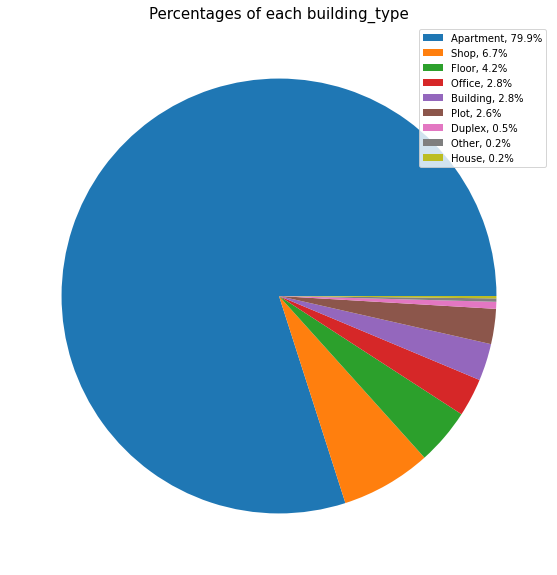

In [118]:
# Finding the percentages for the new column
labels = [f'{l}, {s:0.1f}%' for l, s in zip(data["new_building_type"].unique(), (data["new_building_type"].value_counts()/33703)*100)]
print(labels)
plt.figure(figsize = (20,10))
plt.pie(data["new_building_type"].value_counts())
plt.legend(data["new_building_type"].unique(),loc='upper right',labels = labels)
plt.title("Percentages of each building_type",fontsize = 15)
plt.show()

<Figure size 1440x720 with 0 Axes>

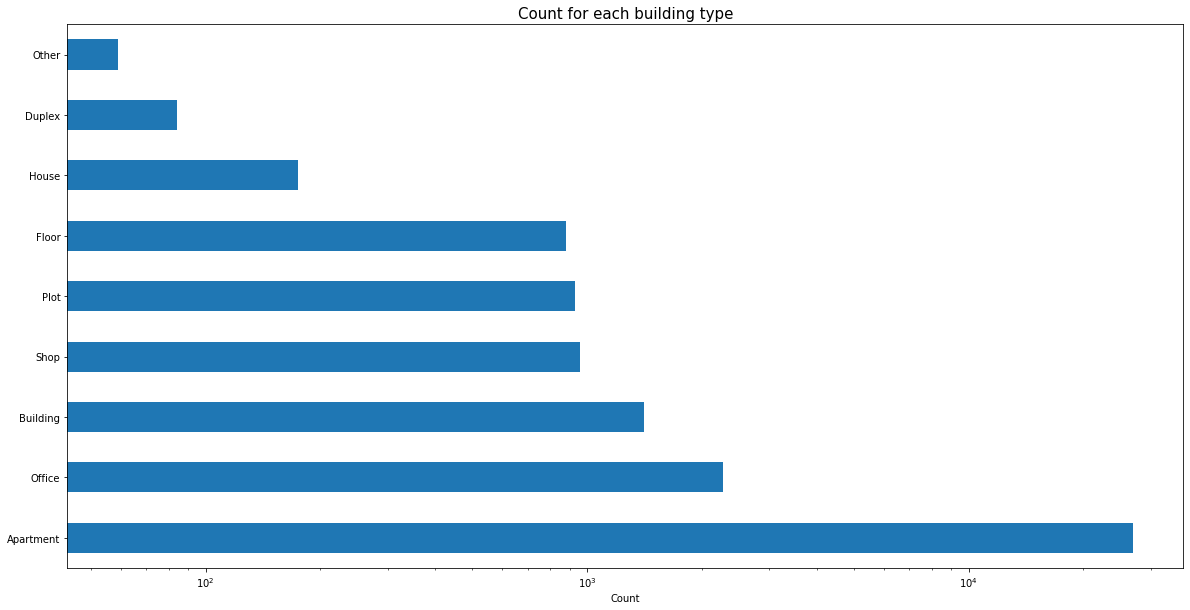

In [119]:
plt.figure(figsize = (20,10))
plt.figure(figsize = (20,10))
data["new_building_type"].value_counts().plot(kind = "barh")
plt.title("Count for each building type",fontsize = 15)
plt.xlabel("Count")
plt.xscale("log")
plt.show()

 **Determining the price variations  for each <i>building_type</i>**

In [120]:
# removing price rows that are empty or have value "0"
non_zero_price = data.dropna(subset = ["price"])
non_zero_price = data[data["price"]>0]

In [121]:
# building_type and purpose are grouped to calculate the mean price of "Sale" and "Rent" of 
# each building type
avg_price_building = non_zero_price.groupby(["new_building_type","purpose"],as_index = False)["price"].agg("mean")
avg_price_building

,new_building_type,purpose,price
0,Apartment,Rent,6.664571e+06
1,Apartment,Sale,2.671390e+09
2,Building,Rent,8.760356e+07
3,Building,Sale,7.466818e+07
4,Duplex,Rent,2.824167e+05
5,Duplex,Sale,4.528889e+07
6,Floor,Rent,4.798500e+05
7,Floor,Sale,5.032089e+07
8,House,Rent,3.014254e+05
9,House,Sale,1.216533e+11


In [122]:
avg_price_building_sale = avg_price_building[avg_price_building["purpose"] == "Sale"]
avg_price_building_rent = avg_price_building[avg_price_building["purpose"] == "Rent"]

<a id = "avg_price_building_type"></a>

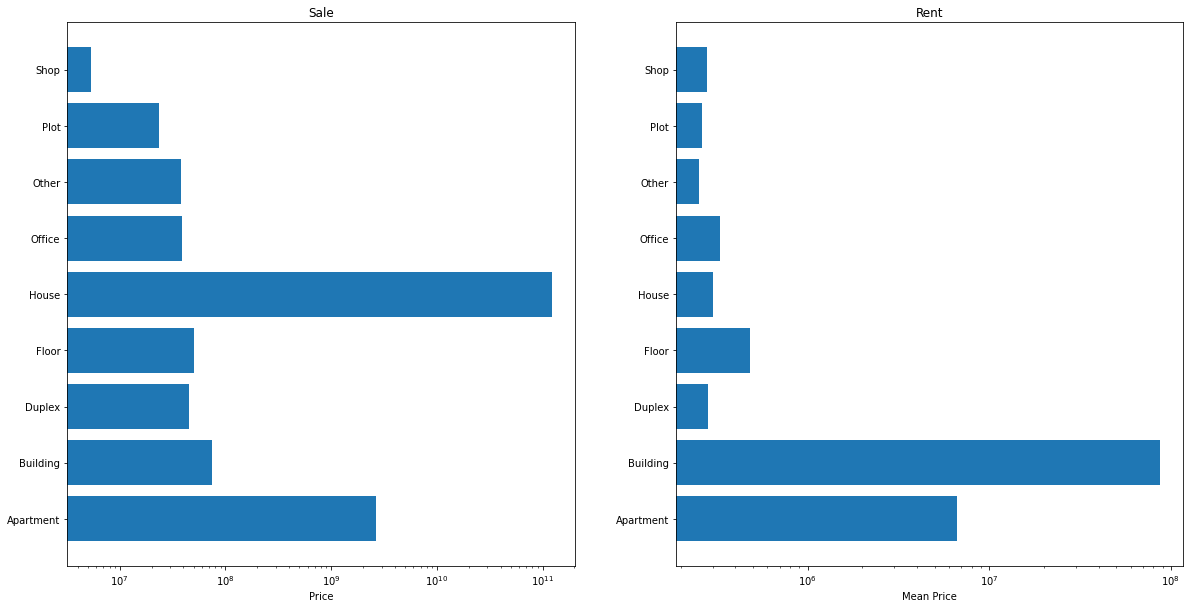

In [123]:
# finding the mean prices for sale and rent data
fig, ax = plt.subplots(1,2)

ax[0].barh(avg_price_building_sale["new_building_type"],avg_price_building_sale["price"])
ax[0].set_xscale("log")
ax[0].set_title("Sale")
ax[0].set_xlabel("Price")


ax[1].barh(avg_price_building_rent["new_building_type"],avg_price_building_rent["price"])
ax[1].set_xscale("log")
ax[1].set_title("Rent")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([20,10])
plt.show()

## Question 9
#### (a) How does property price differentiate between commercial and residential areas (e.g.commercial properties generally have a higher prices compared to residential properties)?
    

In [124]:
data["building_nature"].value_counts()

Residential    27221
Commercial      6482
Name: building_nature, dtype: int64

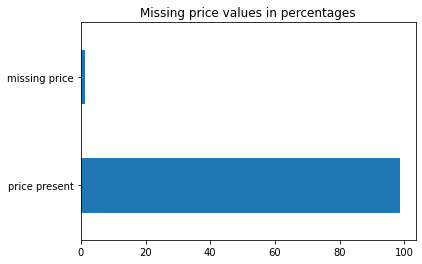

In [125]:
# finding out the missing price values from the data
temp = pd.Series(np.where(data["price"]  <= 0,"missing price","price present"))
prct = (temp.value_counts()/temp.value_counts().sum())*100
plt.title("Missing price values in percentages")
prct.plot(kind = "barh")
plt.show()

In [126]:
# Total number of missing and present price data
len(temp[temp =="missing price"]) , len(temp[temp =="price present"]) 

(479, 33224)

In [127]:
# percentage of present and missing data
prct

price present    98.578762
missing price     1.421238
dtype: float64

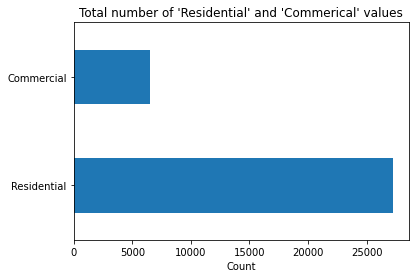

In [128]:
data["building_nature"].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.title("Total number of 'Residential' and 'Commerical' values")
plt.show()

In [129]:
# removing price values who have empty price values
non_zero_price = data.dropna(subset = ["price"])
non_zero_price = data[data["price"]>0]

In [130]:
# finding out the mean price value for Commercial and Residential 
mean_price_building_nature = non_zero_price.groupby(["building_nature","purpose"],as_index = False)["price"].mean()
mean_price_building_nature

,building_nature,purpose,price
0,Commercial,Rent,2.018809e+07
1,Commercial,Sale,2.633196e+07
2,Residential,Rent,7.013731e+06
3,Residential,Sale,2.932133e+09


In [131]:
# distribution of mean price for sale and rent
sale_price_building_nature = mean_price_building_nature[mean_price_building_nature["purpose"] == "Sale"]
rent_price_building_nature = mean_price_building_nature[mean_price_building_nature["purpose"] == "Rent"]


<a id ="sale_rent_price"></a>

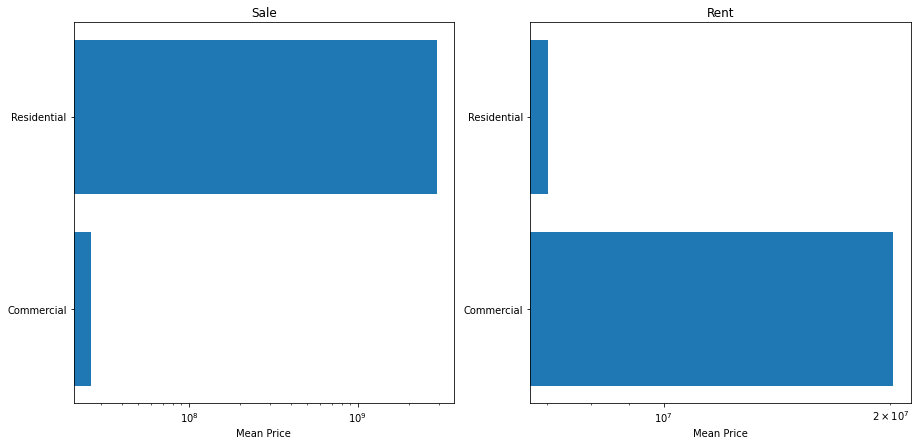

In [132]:
fig,ax = plt.subplots(1,2)
ax[0].barh(sale_price_building_nature["building_nature"],sale_price_building_nature["price"])
ax[0].set_title("Sale")
ax[0].set_xlabel("Mean Price")
ax[0].set_xscale("log")


ax[1].barh(rent_price_building_nature["building_nature"],rent_price_building_nature["price"])
ax[1].set_title("Rent")
ax[1].set_xscale("log")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([15,7])
plt.show()


In [133]:
# Price Distribution "Sale"
prcl_price_sale = data[(data["purpose"] == "Sale")].price.describe(percentiles = [0.05,0.25,0.50,0.75,0.90,0.95])
prcl_price_sale

count    1.298000e+04
mean     2.762437e+09
std      2.123883e+11
min      0.000000e+00
5%       3.000000e+06
25%      5.000000e+06
50%      7.343500e+06
75%      1.150000e+07
90%      2.100000e+07
95%      3.800000e+07
max      2.400000e+13
Name: price, dtype: float64

In [134]:
#  Price Distribution "Rent"
prcl_price_rent = data[(data["purpose"] == "Rent")].price.describe(percentiles = [0.05,0.25,0.50,0.75,0.90,0.95])
prcl_price_rent

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
5%       6.500000e+03
25%      1.800000e+04
50%      3.300000e+04
75%      1.100000e+05
90%      3.800000e+05
95%      7.350000e+05
max      1.000000e+11
Name: price, dtype: float64

In [135]:
#  Area Distribution "Rent"
prcl_area_sale = data[(data.purpose == 'Sale')].area.describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95])


In [136]:
# Area Distribution "Rent"
prcl_area_rent = data[(data.purpose == 'Rent')].area.describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95])

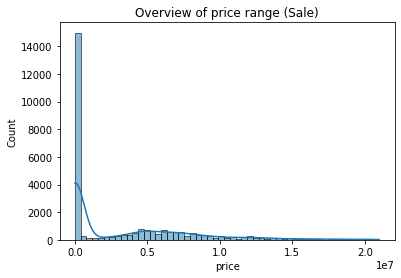

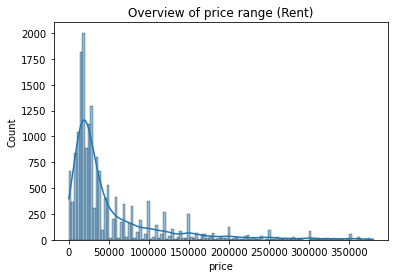

In [137]:
data_sale = data[(data["area"] <= prcl_area_sale["90%"])&
                (data["price"] <= prcl_price_sale["90%"])]
                #(data["purpose"] == "Sale")]

sns.histplot(data = data_sale["price"],kde = True)
plt.title("Overview of price range (Sale)")
plt.show()

data_rent = data[(data["area"] <= prcl_area_rent["90%"])&
                (data["price"] <= prcl_price_rent["90%"])]
                #(data["purpose"] == "Rent")]

sns.histplot(data = data_rent["price"],kde = True)
plt.title("Overview of price range (Rent)")
plt.show()

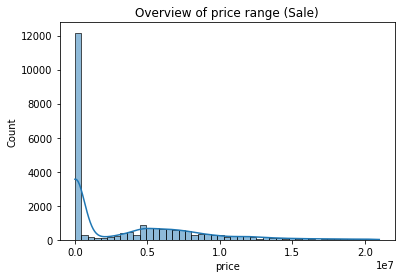

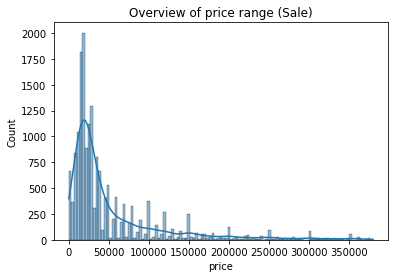

In [138]:
data_sale = data[(data["area"] <= prcl_area_sale["90%"])&
                (data["price"] <= prcl_price_sale["90%"])&
                #(data["purpose"] == "Sale")&
                (data["building_nature"] == "Residential")]

data_sale = data[(data["area"] <= prcl_area_sale["90%"])&
                (data["price"] <= prcl_price_sale["90%"])&
                #(data["purpose"] == "Sale")&
                (data["building_nature"] == "Residential")]

fig,ax = plt.subplots(1,1)
sns.histplot(data = data_sale["price"],kde = True)
plt.title("Overview of price range (Sale)")


fig,ax = plt.subplots(1,1)
sns.histplot(data = data_rent["price"],kde = True)
plt.title("Overview of price range (Sale)")
plt.show()

<a id="price_building_nature"></a>

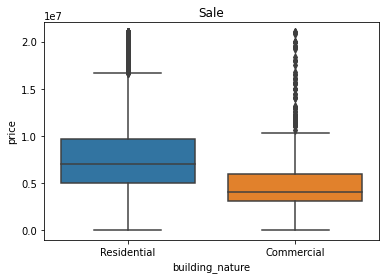

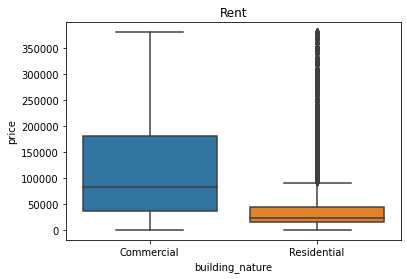

In [139]:
# removing price values  with percentile above 90 
data_sale = data[(data["purpose"] == "Sale") 
                 & (prcl_price_sale["90%"] >= data["price"])] 
                 #& (prcl_price_sale["5%"] <= data["price"])]
data_rent = data[(data["purpose"] == "Rent") 
                 & (prcl_price_rent["90%"] >= data["price"])]
                #& (prcl_price_rent["5%"] <= data["price"])]

fig,ax = plt.subplots(1,1)
sns.boxplot(y = "price",x = "building_nature",data = data_sale)
#plt.yscale("log")
plt.title("Sale")

fig,ax = plt.subplots(1,1)
sns.boxplot(y = "price",x = "building_nature",data = data_rent)
#plt.yscale("log")
plt.title("Rent")

plt.show()

#### Impact of <i>**"Resedential"**</i> and <i>**"Commericial"**</i> prices on area

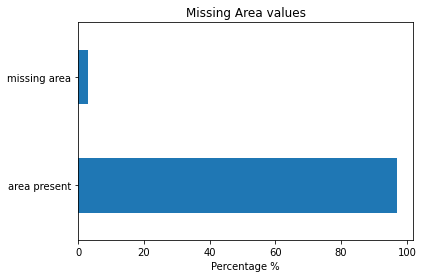

In [140]:
# finding missing area values in dataset
temp = pd.Series(np.where((data["area"].isna()) | (data["area"] <= 0), "missing area","area present"))
prct = (temp.value_counts() / temp.value_counts().sum() ) *100
prct.plot(kind = "barh")
plt.xlabel("Percentage %")
plt.title("Missing Area values")
plt.show()

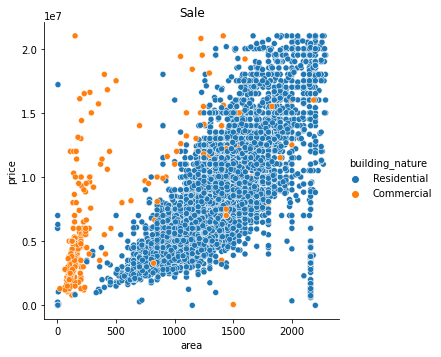

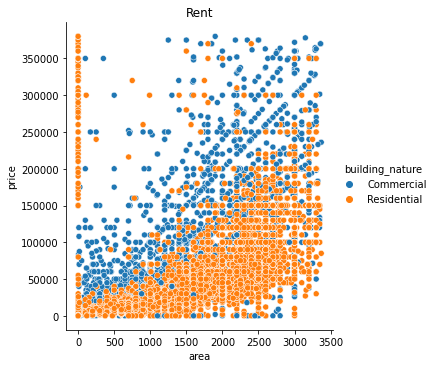

In [141]:
# removing area and price data with percentile > 90
data_sale = data[(data["area"] <= prcl_area_sale["90%"])&
                (data["price"] <= prcl_price_sale["90%"])&
                 #(data["area"] >= prcl_area_sale["5%"])&
                 #(data["price"] >= prcl_area_sale["5%"])&
                (data["purpose"] == "Sale")]

sns.relplot(x = "area",y = "price",hue = "building_nature",data = data_sale ,kind = "scatter")
plt.title("Sale")

data_rent = data[(data["area"] <= prcl_area_rent["90%"])&
                (data["price"] <= prcl_price_rent["90%"])&
                (data["purpose"] == "Rent")]

sns.relplot(x = "area",y = "price",hue = "building_nature",data = data_rent ,kind = "scatter")
plt.title("Rent")
plt.show()

#### Comparing prices impact on <i>**"Commercial"**</i> and <i>**"Residential"**</i> building nature with each city

 **Sale price of each city**

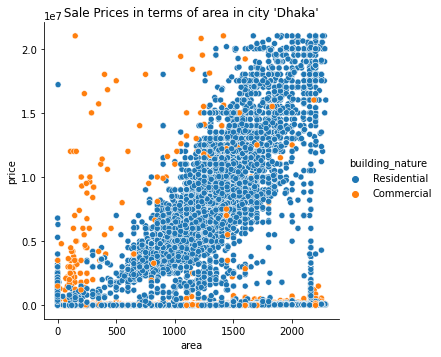

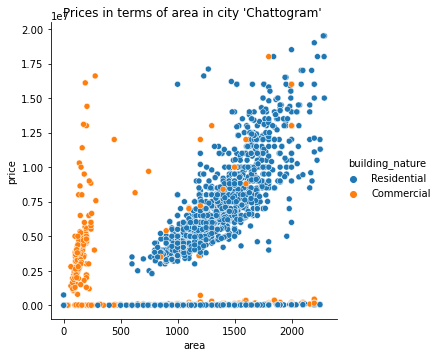

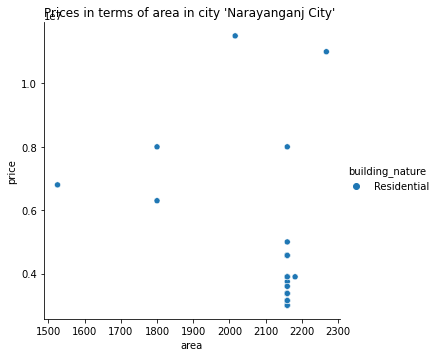

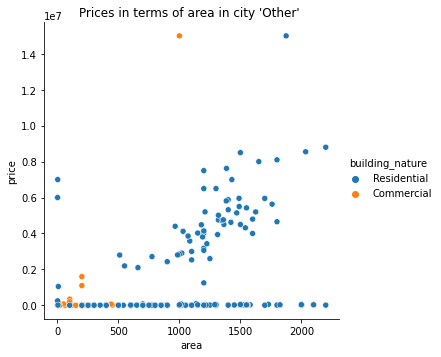

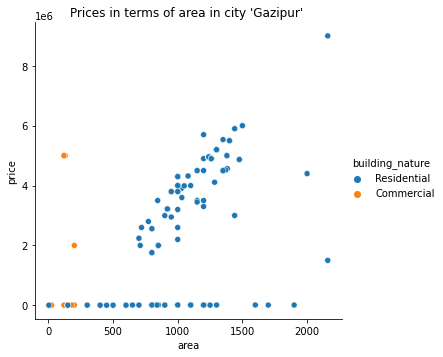

In [142]:

temp_data = data[((data["new_city"] == "Dhaka"))&
                (data["price"] <= prcl_price_sale["90%"])&
                (data["area"] <= prcl_area_sale["90%"])]

sns.relplot( x = "area",y= "price",hue = "building_nature",data = temp_data)
plt.title(" Sale Prices in terms of area in city 'Dhaka' ")

temp_data = data[((data["new_city"] == "Chattogram"))&
                (data["price"] <= prcl_price_sale["90%"])&
                (data["area"] <= prcl_area_sale["90%"])]

sns.relplot( x = "area",y= "price",hue = "building_nature",data = temp_data)
plt.title("Prices in terms of area in city 'Chattogram' ")

temp_data = data[((data["new_city"] == "Narayanganj City"))&
                (data["price"] <= prcl_price_sale["90%"])&
                (data["area"] <= prcl_area_sale["90%"])]

sns.relplot( x = "area",y= "price",hue = "building_nature",data = temp_data)
plt.title("Prices in terms of area in city 'Narayanganj City' ")

temp_data = data[((data["new_city"] == "Other"))&
                (data["price"] <= prcl_price_sale["90%"])&
                (data["area"] <= prcl_area_sale["90%"])]

sns.relplot( x = "area",y= "price",hue = "building_nature",data = temp_data)
plt.title("Prices in terms of area in city 'Other' ")

temp_data = data[((data["new_city"] == "Gazipur"))&
                (data["price"] <= prcl_price_sale["90%"])&
                (data["area"] <= prcl_area_sale["90%"])]

sns.relplot( x = "area",y= "price",hue = "building_nature",data = temp_data)
plt.title("Prices in terms of area in city 'Gazipur' ")

plt.show()

**Rent price of  each city**

Text(0.5, 1.0, "Prices in terms of area in city 'Gazipur' ")

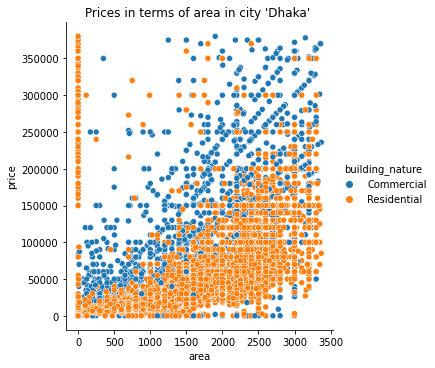

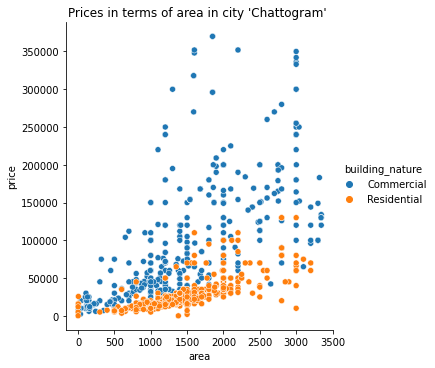

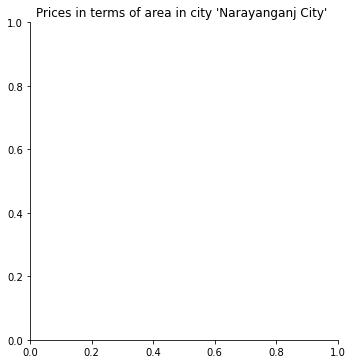

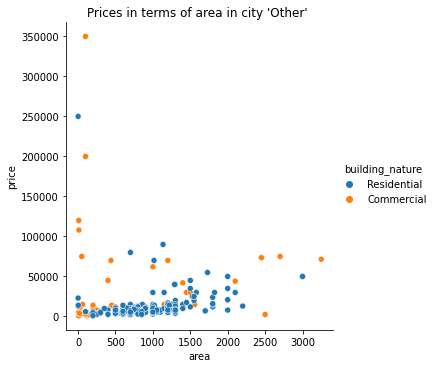

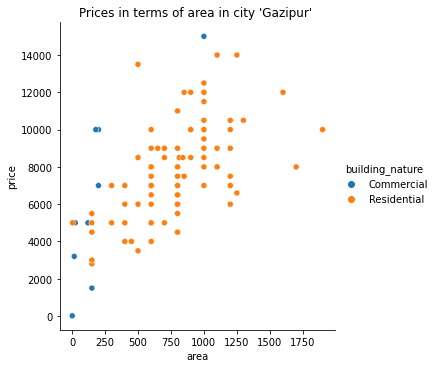

In [143]:

temp_data = data[((data["new_city"] == "Dhaka"))&
                (data["price"] <= prcl_price_rent["90%"])&
                (data["area"] <= prcl_area_rent["90%"])]

sns.relplot( x = "area",y= "price",hue = "building_nature",data = temp_data)
plt.title("Prices in terms of area in city 'Dhaka' ")

temp_data = data[((data["new_city"] == "Chattogram"))&
                (data["price"] <= prcl_price_rent["90%"])&
                (data["area"] <= prcl_area_rent["90%"])]

sns.relplot( x = "area",y= "price",hue = "building_nature",data = temp_data)
plt.title("Prices in terms of area in city 'Chattogram' ")

temp_data = data[((data["new_city"] == "Narayanganj City"))&
                (data["price"] <= prcl_price_rent["90%"])&
                (data["area"] <= prcl_area_rent["90%"])]

sns.relplot( x = "area",y= "price",hue = "building_nature",data = temp_data)
plt.title("Prices in terms of area in city 'Narayanganj City' ")

temp_data = data[((data["new_city"] == "Other"))&
                (data["price"] <= prcl_price_rent["90%"])&
                (data["area"] <= prcl_area_rent["90%"])]

sns.relplot( x = "area",y= "price",hue = "building_nature",data = temp_data)
plt.title("Prices in terms of area in city 'Other' ")

temp_data = data[((data["new_city"] == "Gazipur"))&
                (data["price"] <= prcl_price_rent["90%"])&
                (data["area"] <= prcl_area_rent["90%"])]

sns.relplot( x = "area",y= "price",hue = "building_nature",data = temp_data)
plt.title("Prices in terms of area in city 'Gazipur' ")

Question 5: Distribution of properties per city (we need to know which cities we can make prediction for)

In [144]:
city = data.groupby("city")["city"].agg("count")

In [145]:
city_less_100 = city[city<100]

In [146]:
data["city"] = data["city"].apply(lambda i:"Other" if i in city_less_100 else i) #We are naming the group as "Other"


In [147]:

data["city"].value_counts()

Dhaka               28683
Chattogram           3481
Narayanganj City      441
Other                 423
Barishal              352
Gazipur               323
Name: city, dtype: int64

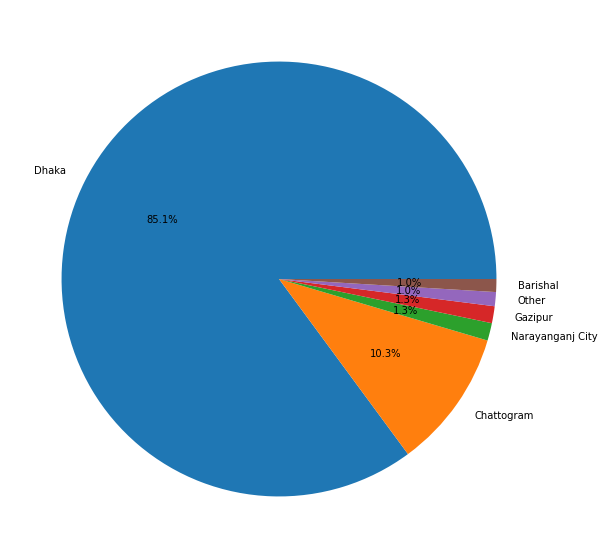

In [148]:
plt.figure(figsize = (20,10))
plt.pie(data["city"].value_counts(), labels = data["city"].unique(), autopct = "%2.1f%%")
plt.show()

<AxesSubplot:xlabel='city', ylabel='count'>

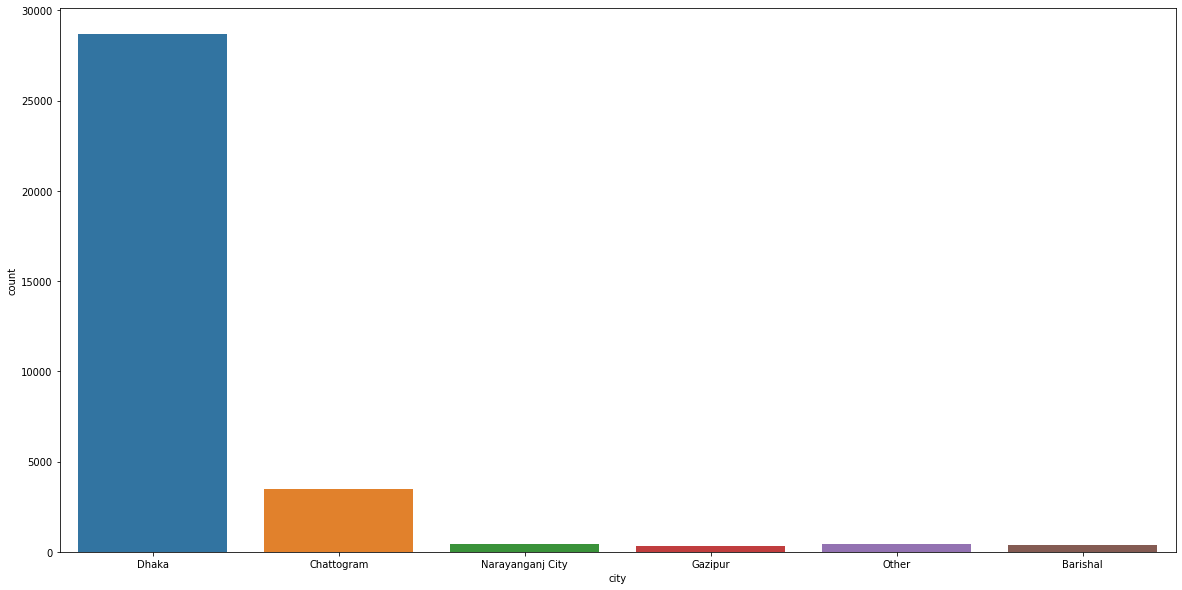

In [149]:
plt.figure(figsize = (20,10))
sns.countplot(x= data["city"])

In [150]:
 x = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_dhaka = x[x["city"]== "Dhaka"]

In [151]:
city_dhaka

,new_building_type,city,price
2,Apartment,Dhaka,1.262123e+09
8,Building,Dhaka,8.250335e+07
12,Duplex,Dhaka,1.965655e+07
14,Floor,Dhaka,5.282550e+06
17,House,Dhaka,4.238118e+10
21,Office,Dhaka,3.519467e+06
24,Other,Dhaka,7.475535e+06
26,Plot,Dhaka,3.812230e+07
31,Shop,Dhaka,1.781855e+06


In [152]:
 y = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_chattogram = x[x["city"]== "Chattogram"]
city_chattogram

,new_building_type,city,price
1,Apartment,Chattogram,6.598380e+06
7,Building,Chattogram,3.437367e+07
11,Duplex,Chattogram,1.845750e+07
13,Floor,Chattogram,1.842857e+06
16,House,Chattogram,3.700367e+06
20,Office,Chattogram,4.231244e+06
23,Other,Chattogram,4.105000e+05
25,Plot,Chattogram,3.616332e+07
30,Shop,Chattogram,3.732430e+06


In [153]:
 z = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_Narayanganj = x[x["city"]== "Narayanganj City"]

In [154]:
q = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_Barishal = x[x["city"]== "Barishal"]
city_Barishal

,new_building_type,city,price
0,Apartment,Barishal,7.226052e+03
6,Building,Barishal,5.645438e+06
15,House,Barishal,2.858750e+10
29,Shop,Barishal,5.487515e+05


In [155]:
w = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_Gazipur = x[x["city"]== "Gazipur"]

In [156]:
v = pd.DataFrame(data.groupby(["new_building_type","city"], as_index = False)["price"].agg("mean"))
city_other = x[x["city"]== "Other"]
city_other

,new_building_type,city,price
5,Apartment,Other,1.856202e+08
10,Building,Other,3.897151e+08
19,House,Other,1.180222e+10
22,Office,Other,6.000000e+07
33,Shop,Other,4.095304e+05


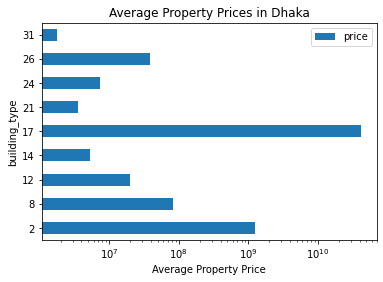

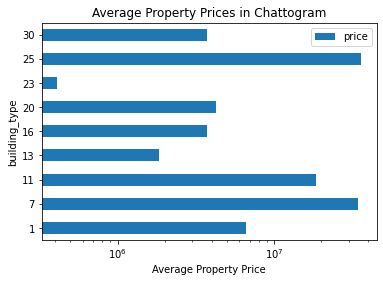

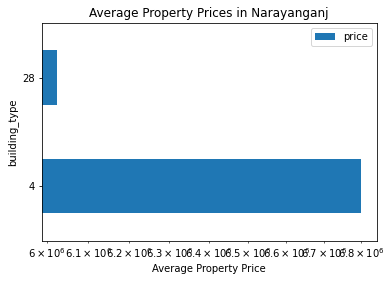

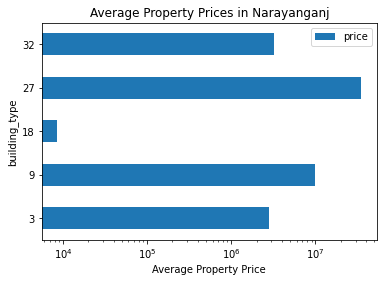

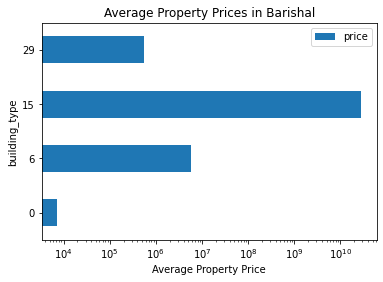

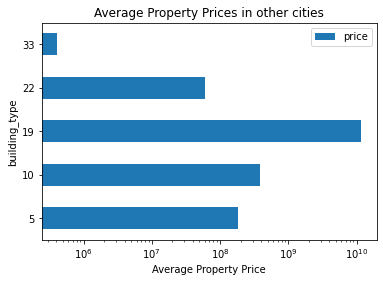

In [157]:
city_dhaka.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in Dhaka')
plt.xscale("log")

city_chattogram.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in Chattogram')
plt.xscale("log")

city_Narayanganj.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in Narayanganj')
plt.xscale("log")

city_Gazipur.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in Narayanganj')
plt.xscale("log")

city_Barishal.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in Barishal')
plt.xscale("log")

city_other.plot(kind = "barh")
plt.xlabel('Average Property Price')
plt.ylabel('building_type')
plt.title('Average Property Prices in other cities')
plt.xscale("log")